# Data Cleaning and Profilling - Paper Themes from Digital Twins

In [1]:
# basic libraries
import pandas as pd
import numpy as np

In [2]:
papers = pd.read_csv("../State of Art 33708b985809439182238815f44e02d2 - Copy.csv")

In [3]:
papers.head()

,Name,Type,Material Type,Link,Keyword,Country,Year,Abstract,Responsible,Status,Created by,Created time
0,Digital twin design for real-time monitoring -...,Academic,Technical paper,https://www.tandfonline.com/doi/full/10.1080/0...,"Digital_twin, monitoring",Taiwan,NaN,NaN,NaN,Not started,Alex,"October 18, 2022 2:38 PM"
1,https://ieeexplore.ieee.org/document/9325551/,Academic,Technical paper,https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,"Digital_twin, Healthcare, monitoring",Italy,NaN,NaN,NaN,Not started,Alex,"October 18, 2022 2:47 PM"
2,"Digital Twin: Values, Challenges and Enablers ...",Academic,Technical paper,https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,"Digital_twin, Hybrid Analysis and Modeling, Ma...","Norway, United States",NaN,NaN,NaN,Not started,Alex,"October 18, 2022 2:58 PM"
3,Cyber-Physical Cloud Manufacturing Systems Wit...,Academic,Technical paper,https://ieeexplore.ieee.org/stamp/stamp.jsp?tp...,"Digital_twin, MTconnect, cyberphysical cloud m...",United States,NaN,NaN,NaN,Not started,Alex,"October 18, 2022 3:04 PM"
4,Data‐driven physics‐based digital twins via a ...,Academic,Technical paper,https://onlinelibrary.wiley.com/doi/epdf/10.10...,"Digital_twin, data-model fusion, reduced-order...","Switzerland, United States",NaN,NaN,NaN,Not started,Alex,"October 18, 2022 3:11 PM"


# Shape and Data Types

In [4]:
papers.shape

(405, 12)

In [5]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           403 non-null    object 
 1   Type           403 non-null    object 
 2   Material Type  402 non-null    object 
 3   Link           401 non-null    object 
 4   Keyword        397 non-null    object 
 5   Country        399 non-null    object 
 6   Year           333 non-null    float64
 7   Abstract       333 non-null    object 
 8   Responsible    0 non-null      float64
 9   Status         405 non-null    object 
 10  Created by     405 non-null    object 
 11  Created time   405 non-null    object 
dtypes: float64(2), object(10)
memory usage: 38.1+ KB


OBS: 
* Not many Names, Types or Materials_Type missing
* Responsible is useless for data gathering
* If more that one country, comma separated string
* Created By and Status will not be used for the Analysis (data about info gathering) 

In [6]:
# uniqueness - Type

papers.columns

Index(['Name', 'Type', 'Material Type', 'Link', 'Keyword', 'Country', 'Year',
       'Abstract', 'Responsible', 'Status', 'Created by', 'Created time'],
      dtype='object')

In [7]:
papers['Type'].unique()

array(['Academic', 'Industrial', 'Business', nan], dtype=object)

In [8]:
papers['Type'].value_counts()

Academic      357
Industrial     36
Business       10
Name: Type, dtype: int64

OBS: 

* Mostly all of them are Academic, since it was specified, let's drop the "Business" category later

In [9]:
# uniqueness - Material Type

papers['Material Type'].value_counts()


Article              165
Conference Paper     144
Website               41
Technical paper       21
Review                17
Book Chapter           5
Report                 4
Cumulative report      2
Editorial              2
Book                   1
Name: Material Type, dtype: int64

OBS: 

* Perhaps put together those with least frequency

In [10]:
# uniqueness - Material Type

papers["Keyword"].nunique()

336

OBS: 
* A lot of unique values, basically one for each paper, so it needs to be dealt with by using Natural Language Processing

In [11]:
# uniqueness - country

papers["Country"].nunique()

105

In [12]:
papers["Country"].value_counts()

China                           79
Germany                         38
Italy                           24
United States                   21
Russian Federation              19
                                ..
Australia, Belgium               1
China, Mexico, United States     1
Italy, Spain, Sweden             1
China, United States             1
Taiwan                           1
Name: Country, Length: 105, dtype: int64

OBS:
* Countries will need to be separated in order to sort them correctly
* Perhaps create extra columns for adicional countries
* Understand how to visualize this

In [13]:
# uniqueness - Year 
papers["Year"].value_counts()


2021.0    128
2022.0     74
2020.0     67
2019.0     49
2018.0     13
2023.0      1
2017.0      1
Name: Year, dtype: int64

OBS: 
* A lot of Missing Values
* Mostly recent papers
* Can be droped


## Check for Duplicates

In [14]:
papers.duplicated().sum()

# No duplicates BEFORE data cleaning (can change after)

0

## Checking for Completeness

In [15]:
not_null = papers.count().sum()
print(not_null)

4286


In [16]:
null = papers.isnull().sum().sum()
print(null)

574


In [17]:
total = not_null + null
print(total)

4860


In [18]:
completeness = not_null/total
print(f"completeness: {completeness*100}%")

completeness: 88.18930041152264%


OBS:
* We might wanna do this again AFTER dropping columns you may not use

# TODOS SO FAR

1. Drop columns: Link, Responsible, Status, Created By and Created Time
2. Drop Business Category in Academic and them ignore the column
3. In Material Type column, put minor categories in one big category called "Others" 
4. Drop the Year category as well since basically all of them are recent (thanks to the topic)

 1,2 and 4 - Droping Columns that won't be used for the analysis

In [19]:
clean_df = papers.drop(columns=["Responsible","Link","Status","Created by","Created time","Year","Type"])

3 - Creating a category called others in order to group by the objects from "Material Type" that appear in smaller freqeuncies

In [20]:
# the method replace accept list types, and as you can see below, the new values counts represent what is happening

clean_df["Material Type"].replace(
    ["Website", "Technical paper", "Review", "Book Chapter", "Report", "Cumulative report", 
    "Editorial", "Book"], "Others", inplace=True
    )

In [21]:
clean_df["Material Type"].value_counts()

Article             165
Conference Paper    144
Others               93
Name: Material Type, dtype: int64

In [22]:
# since there was only one Name with wrong name, this was corrected manually

clean_df.iloc[1]["Name"] = 'Pervasive and Connected Digital Twins - A Vision for Digital Health'

# Data Profiling

In [23]:
clean_df.dtypes

Name             object
Material Type    object
Keyword          object
Country          object
Abstract         object
dtype: object

As we can see, every column is made up by categorical features. However, in order to procede with the profiling, we need to understand the nature of each column and think about how it should be treated and visualized:

1. Name 
2. Material Type 
3. Keyword 
4. Country 
5. Abstract

# Pandas Profiling - automated profiling

In [24]:
import pandas_profiling as pp

#create report in html 

profile = pp.ProfileReport(clean_df,title="Report HTML")
profile.to_file("profiling.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Observations from Pandas Profiling

1. There are a lot of duplicated papers, that should be dropped
2. In some of the strings, there are chinese characters, that need to be analised
3. Only a few values are missing in the 4 main columns, the abstract, however, has 72 missing ones
4. Name: min lenght = 3 ?
5. Keyword: words separated by commas, it needs to be separated
6. Country: min lenght = 2 ? And same problem as with the keywords
7. Abstract: a lot of missing values, duplicated as well

## Dealing with Duplicated Values

In [25]:
# dropping duplicates 
clean_df.drop_duplicates(inplace=True)

In [26]:
# check shape, a lot of values were dropped
clean_df.shape

(355, 5)

In [27]:
# rerun the profiling tool in order to check if all duplicates were dropped

import pandas_profiling as pp

profile = pp.ProfileReport(clean_df,title="Report HTML")
profile.to_file("profiling_duplicate.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
clean_df.duplicated().sum()

0

In [29]:
# even after dropping duplicated, by analysing the data displayed in the profiling, there are papers with the same Name
# let's see them

clean_df[clean_df["Name"]=="WareBee"]

,Name,Material Type,Keyword,Country,Abstract
34,WareBee,NaN,NaN,NaN,NaN
35,WareBee,Others,"Digital_twin, Warehouse",UK,NaN


In [30]:
clean_df[clean_df["Name"]=="The connotation of digital twin, and the construction and application method of shop-floor digital twin"]

,Name,Material Type,Keyword,Country,Abstract
8,"The connotation of digital twin, and the const...",Others,"Digital Mapping, Digital_twin, Feasibility, Ma...",China,NaN
153,"The connotation of digital twin, and the const...",Article,"Agricultural robots, Application method, Cyber...",China,"Digital twin (DT) technology provides a novel,..."


In [31]:
# droping this specific repeted rows 
clean_df.drop([8,34], inplace=True)

In [32]:
clean_df.columns

Index(['Name', 'Material Type', 'Keyword', 'Country', 'Abstract'], dtype='object')

## Missing Data: Names, Material Type, Keyword and Country

Since most nan values from Keyword and Country share their incompletness with Name and Material Type rowyse, we just need to drop it.

In [33]:
#creating new df with not null keyword values
df_not_nan = clean_df[clean_df["Keyword"].notna()]

In [34]:
#creating new df with not null Country values
df_not_nan = df_not_nan[df_not_nan["Country"].notna()]

In [35]:
df_not_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 376
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           347 non-null    object
 1   Material Type  347 non-null    object
 2   Keyword        347 non-null    object
 3   Country        347 non-null    object
 4   Abstract       281 non-null    object
dtypes: object(5)
memory usage: 16.3+ KB


As we can see in the info, it only remains the null values from the abstract. Which will be dealt with later in the analysis.

## Investigating weird values seen in Name and Country

During the Proffiling, it was possible to see that some datapoints had strange lengths 

In [36]:
names = list(df_not_nan["Name"].unique())

def print_small_lens(names, thresh = 10):
    for name in names:
        if len(name) < thresh:
            print(name)

print_small_lens(names)

Intangles
Altair
MetaTwin
Siemens
IBM
Oracle
Braincube
IoTwins
WareBee
Twinu
ReLOG3P
TonePedia
Orbit GT
AppsBow
TWAICE
Maplewell
IBM DT
SWIM EDX


As it is possible to see, some names are not very clear when it comes to specifying the research, but no wrong data entries

In [37]:
# we do it as well for Country
names = list(df_not_nan["Country"].unique())

print_small_lens(names,thresh=5)

UK
EU
Iran


## Country feature processing for analysis 

In order to analyse this column effectvely, it is necessary to separate the strings, since that the current configuration treats the list of countries as a string, without separating it.

In [38]:
# function that separates each country and stores them separatly in lists
df_not_nan["Country"] = df_not_nan["Country"].apply(lambda x: x.split(", "))

In [39]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def get_freq_strings(df_column):
    '''
    Transforms the set of lists in a dictionary with the overall frequencies
    '''
    string_countries = df_column.sum()
    count_dict = dict(Counter(string_countries))
    count_dict = sort_dict(count_dict) 

    return count_dict

def sort_dict(dictionary):
    '''
    Sort the values of the frequency
    '''
    sorted_values = sorted(dictionary.values(),reverse=True) # Sort the values
    sorted_dict = {}

    for i in sorted_values:
        for k in dictionary.keys():
            if dictionary[k] == i:
                sorted_dict[k] = dictionary[k]

    return sorted_dict

def plot_freq_string(count_dict,title,n=10):
    '''
    Plot the results of the n most frequent elements 
    '''
    plt.figure(figsize=(16,8))
    keys = list(count_dict.keys())[:n]
    values = list(count_dict.values())[:n]

    plt.bar(keys, values)
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [40]:
dic_freq = get_freq_strings(df_not_nan["Country"])

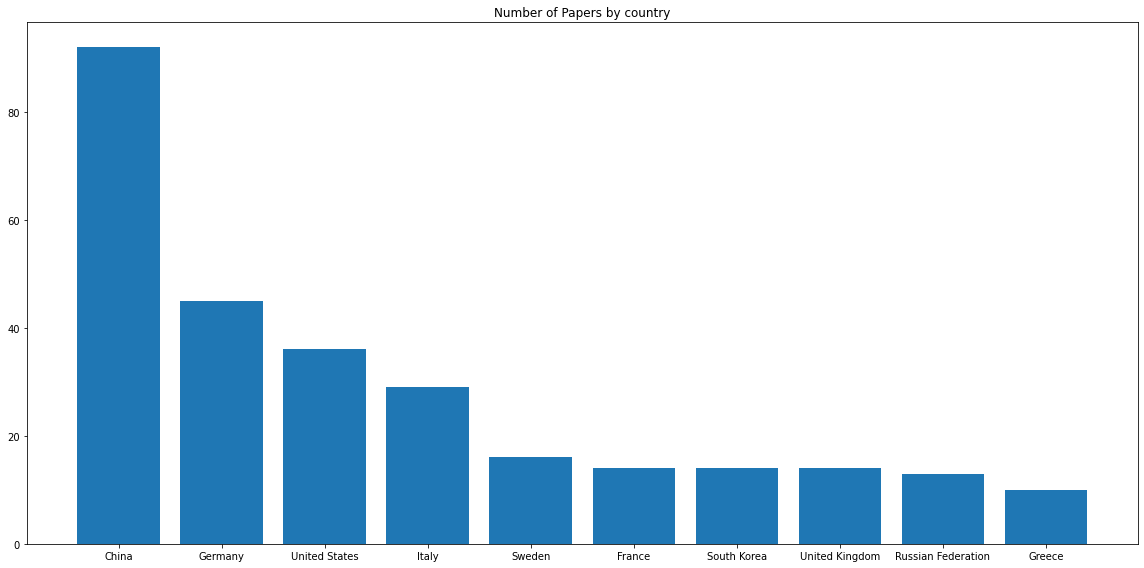

In [41]:
plot_freq_string(dic_freq,title="Number of Papers by country")

As we can see, China is leading the way in terms of researches on Digital-Twins, follow not soo closely by Germany and United States.

## Processing the Keyword columns and plotting as well

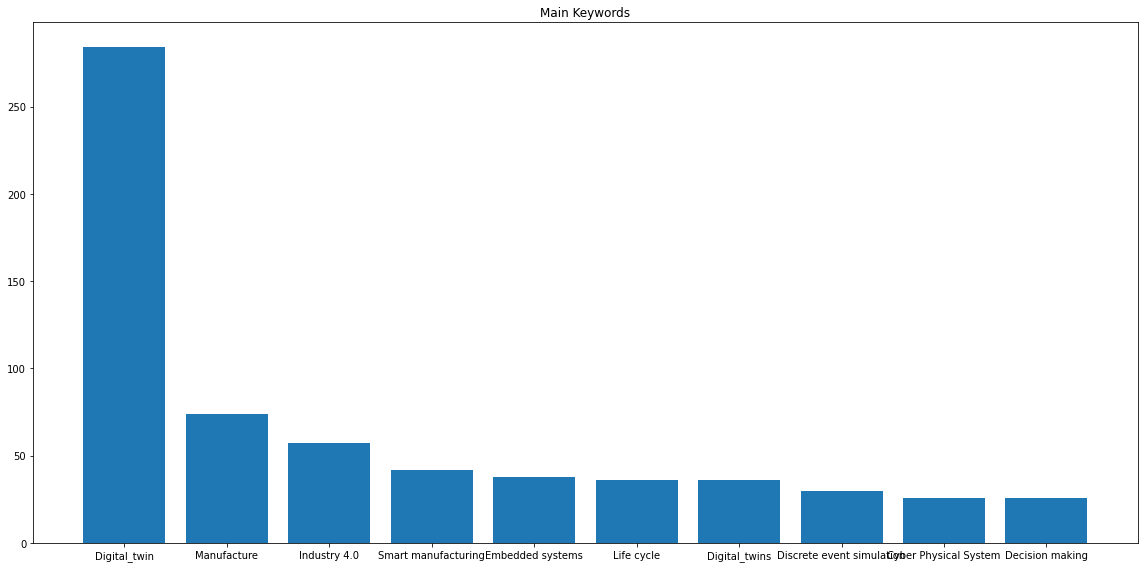

In [42]:
# function that separates each keyword and stores them separatly in lists
df_not_nan["Keyword"] = df_not_nan["Keyword"].apply(lambda x: x.split(", "))

dic_freq = get_freq_strings(df_not_nan["Keyword"])

plot_freq_string(dic_freq, title="Main Keywords")

for no one's surprise, the main keyword present is "Digital Twin", followed by "Manufacture" and "Industry 4.0" 

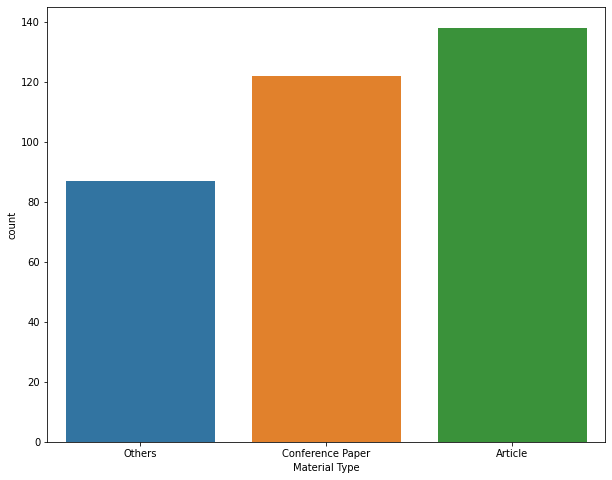

In [43]:
plt.figure(figsize=(10,8))
sns.countplot(data=df_not_nan, x="Material Type")
plt.show()

## String Analysis from Abstract and Names

Not that the categorical features have been visualized, it is time to understand the distribution of words in the Abstract and the Name of the Papers.

In [44]:
# import libraries
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

def gen_wordcloud(df=df_not_nan, column="Keyword", title="wordcloud from keywords"):
    string = df[column].sum()
    if column in ["Keyword","Country"]:
        string = " ".join(df[column].sum())
        
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(string)

    plt.figure(figsize=(10,8))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    return 

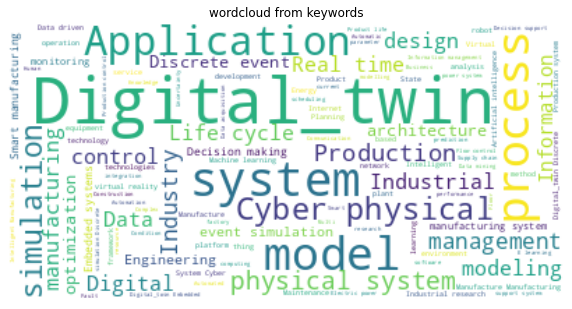

In [45]:
gen_wordcloud()

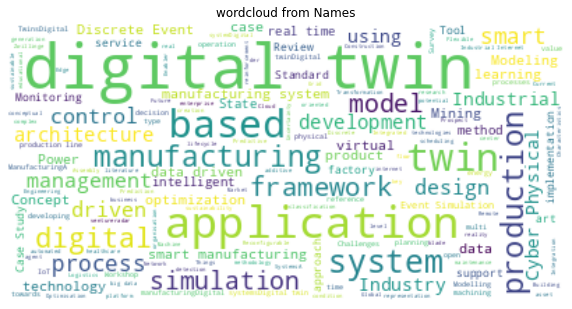

In [46]:
gen_wordcloud(column="Name", title="wordcloud from Names")

    Now that we have a clear idea about the data, we can jump into the preprocessing and feature modeling part in order to create a sistem that show the similarity between the papers based in the five features seen. 

## Saving the new processed data:

In [48]:
df_not_nan.to_csv("../data_clean.csv")